In [1]:
# This notebook computes summary statistics for the files in our dataset and stores them as a csv

In [3]:
# We start by importing all the necessary dependencies

import pandas as pd  #The main package we will be using for data analysis. Used to read CSVs/TSVs, work with dataframe objects, and many other things.
import matplotlib.pyplot as plt  #The standard plotting package, used for making nice pretty pictures.
import os  #We might need this to deal with filenames and paths.
import random  #Used to generate random numbers
import numpy as np  #We might need this, it's a pretty standard package. 
import seaborn as sns
from scipy import stats
import glob

# This gives us a progress bar for longer computations. 
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Put the location of the data folder on your computer
data_location = 'D:/Data/Hangar-Locust/Cleaned/'
subfolder = 'cleaned_2K-locust_15112022/'
file = 'cleaned_255_locust_11152022_0003.tsv'

In [5]:
# Reads the .tsv file as a pandas DataFrame. We choose the Time column to be our index column. 
df = pd.read_csv(data_location + subfolder + file, sep='\t', index_col='Time')
df

,Frame,X.0,Y.0,Z.0,X.1,Y.1,Z.1,X.2,Y.2,Z.2,...,Z.505,X.506,Y.506,Z.506,X.507,Y.507,Z.507,X.517,Y.517,Z.517
Time,,,,,,,,,,,,,,,,,,,,,
0.00,1,1514.375,1351.517,369.488,8.150,375.921,50.705,589.052,2128.429,27.492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01,2,1514.370,1351.519,369.491,8.150,375.928,50.713,589.056,2128.431,27.484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.02,3,1514.368,1351.519,369.494,8.150,375.932,50.717,589.055,2128.430,27.476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.03,4,1514.361,1351.425,369.336,8.156,375.925,50.695,589.061,2128.427,27.449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.04,5,1514.393,1351.430,369.075,8.152,375.926,50.942,588.982,2128.492,27.098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599.95,59996,1514.407,1351.511,369.046,8.262,376.149,51.147,1611.952,2525.003,40.631,...,34.544,NaN,NaN,NaN,495.368,1670.028,26.070,NaN,NaN,NaN
599.96,59997,1514.408,1351.506,369.043,8.263,376.137,51.132,1611.974,2525.013,40.603,...,34.539,NaN,NaN,NaN,495.926,1669.103,26.022,NaN,NaN,NaN
599.97,59998,1514.400,1351.506,369.043,8.267,376.135,51.128,1611.928,2525.041,40.589,...,34.589,NaN,NaN,NaN,496.389,1668.229,26.105,NaN,NaN,NaN


In [23]:
# This function computes and returns various important metadata we might be interested in: the totalframes, framerate, and video length, number of markers
def video_metadata(df):
    #Calculates the first, last, and total number of frames
    firstframe = df['Frame'].min()
    lastframe = df['Frame'].max()
    totalframes = lastframe - firstframe +1
    
    #print(f'The total number of frames is {totalframes}')
    
    
    firsttime = df['Frame'].idxmin()
    lasttime = df['Frame'].idxmax()


    #Calculates the time difference (remember time is the index in our dataframe) between two consecutive frames. This is the duration of a single frame in seconds
    frameduration = df.query('Frame == 2').index.tolist()[0] - df.query('Frame == 1').index.tolist()[0]

    #Calculates the framerate, in frames per second
    framerate = 1/frameduration
    #print(f'The framerate is {framerate} frames per second')

    #Calculates the total length of the video in seconds
    videolength = totalframes*frameduration
    #print(f'The length of the video is {videolength/60:.2f} minutes')
    
    #Calculates the number of markers
    n_markers = int((len(df.columns)-1)/3)
    
    
    
    return totalframes, framerate, videolength, n_markers

In [24]:
video_metadata(df)

(60000, 100.0, 600.0, 345)

In [45]:
#This function computes how much of the dataframe is null, how much of the average marker is null
def null_metadata(df):
    # How many markers do we have?
    n_markers = (len(df.columns)-1)/3
    #print(f'The number of markers is {n_markers:.0f}')
    
    
    mean_null = df.isnull().sum().mean()*100/len(df)
    print(f'The average marker is missing {mean_null:.1f}% of its data')

    # Shows the distribution of markers based on what percentage of their data is null
    ax = (df.isnull().sum()*100/len(df)).plot.hist()
    plt.title(f'Distribution of markers based on what percentage of data is null \n File: {file}')
    ax.set(xlabel="Percentage of data which is null", ylabel="Count")
    plt.show()
    
    return mean_null
    

The average marker is missing 15.4% of its data


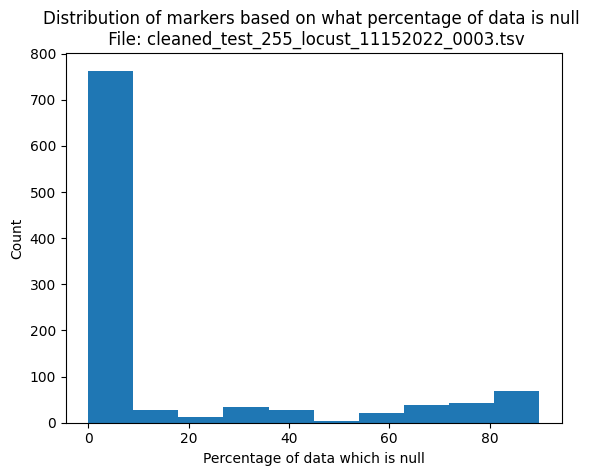

15.416935328185328

In [46]:
null_metadata(df)

In [32]:
os.chdir(data_location+subfolder)
for file in glob.glob("*.tsv"):
    print(file)

cleaned_255_locust_11152022_0001 Backup 2022-11-16 10.05.22.tsv
cleaned_255_locust_11152022_0001.tsv
cleaned_255_locust_11152022_0002.tsv
cleaned_255_locust_11152022_0003.tsv
cleaned_255_locust_11152022_0004.tsv
cleaned_255_locust_11152022_0005.tsv
cleaned_255_locust_11152022_0006.tsv
cleaned_255_locust_11152022_0008.tsv
cleaned_255_locust_11152022_0009.tsv
cleaned_255_locust_11152022_0010.tsv
cleaned_255_locust_11152022_0011.tsv
cleaned_255_locust_11152022_0012.tsv
cleaned_255_locust_11152022_0013.tsv
cleaned_test_255_locust_11152022_0001.tsv
cleaned_test_255_locust_11152022_0002.tsv
cleaned_test_255_locust_11152022_0003.tsv


In [22]:
df.describe()

,Frame,X.0,Y.0,Z.0,X.1,Y.1,Z.1,X.2,Y.2,Z.2,...,Z.505,X.506,Y.506,Z.506,X.507,Y.507,Z.507,X.517,Y.517,Z.517
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,10106.000000,9148.000000,9148.000000,9148.000000,9743.000000,9743.000000,9743.000000,6067.000000,6067.000000,6067.000000
mean,30000.500000,1514.391760,1351.485502,369.065320,8.271928,376.115951,51.124719,1037.624868,2255.364456,32.325824,...,28.922638,1112.863786,2334.171624,29.764647,855.081682,2238.310437,29.551867,1379.658383,1928.561119,34.946965
std,17320.652413,0.023531,0.033058,0.048345,0.016411,0.020359,0.017108,314.181864,295.048388,4.437641,...,5.100058,585.249237,545.258328,6.175981,555.842634,552.209435,6.703798,271.181538,607.866647,4.792032
min,1.000000,1514.295000,1351.390000,368.928000,8.150000,375.921000,50.695000,397.300000,1525.054000,21.642000,...,19.213000,272.668000,1367.754000,18.532000,125.596000,1300.386000,19.209000,919.674000,1212.606000,23.060000
25%,15000.750000,1514.376000,1351.461000,369.030000,8.263000,376.104000,51.113000,796.745000,2048.288250,29.174000,...,24.158000,551.533750,1844.570750,23.719750,348.785500,1767.845500,24.690500,1096.485500,1278.647000,31.826000
50%,30000.500000,1514.393000,1351.482000,369.056000,8.272000,376.118000,51.126000,1066.772000,2282.930500,32.558000,...,29.053000,1204.203000,2579.639500,29.623500,769.764000,2251.035000,27.825000,1394.198000,1890.235000,35.067000
75%,45000.250000,1514.408000,1351.507000,369.097000,8.283000,376.131000,51.137000,1223.462250,2508.896250,35.272000,...,33.577750,1729.264250,2883.774000,35.973000,1334.949000,2799.721000,35.373000,1631.581500,2351.614000,38.045000
max,60000.000000,1514.468000,1351.613000,369.494000,8.323000,376.169000,51.189000,1716.307000,2848.989000,47.271000,...,42.082000,1857.716000,3074.636000,39.790000,1817.665000,3085.756000,97.624000,1776.047000,3083.232000,89.204000
